# Быстрая гистограмма

In [6]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        rv = func()
        total = time.time() - start
        print("Time: ", total)
        return rv
    return wrapper()

In [7]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

def fast_hist(arr: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param arr: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_val = min(arr)
    max_val = max(arr)
    step = (max_val - min_val) / bins
    bins_labels = [min_val + i * step for i in range(bins)]
    bins_labels.append(max_val)
    bins_values = [0] * bins
    for val in arr:
        for i in range(bins):
            if bins_labels[i] <= val < bins_labels[i + 1]:
                bins_values[i] += 1
            if i + 1 == len(bins_labels) - 1 and bins_labels[i + 1] == val:
                bins_values[i] += 1
    bins_labels = np.array(bins_labels).astype(float)
    bins_values = np.array(bins_values).astype(float)
    return bins_values, bins_labels

Значения колонок: [2. 1. 2. 0. 2. 3. 1. 9.]
Названия колонок: [0.    1.125 2.25  3.375 4.5   5.625 6.75  7.875 9.   ]
(8,) (9,)
Значения колонок: [2. 1. 2. 0. 2. 3. 1. 9.]
Названия колонок: [0.    1.125 2.25  3.375 4.5   5.625 6.75  7.875 9.   ]


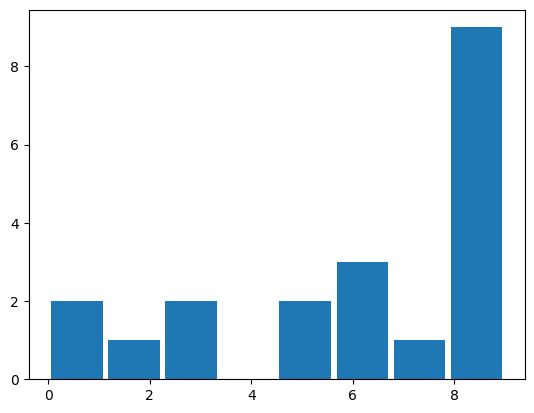

In [8]:
import numpy.random as rand

array = rand.randint(low=0, high=10, size=20)

value_counts, bins_names = fast_hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)
print(value_counts.shape, bins_names.shape)
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)